In [1]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Load dataset
---




In [6]:
df=pd.read_csv('/content/bank-additional-full.csv',sep=';')
#label encoding for target
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
train=df.iloc[:, : 20]
test=df.loc[:, 'y']
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
train=pd.get_dummies(train)#applying One-Hot Encoding
#data normalization
# train=(train-train.mean())/train.std()
train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33)
oversample = SMOTE()
new_X, new_y = oversample.fit_resample(X_train, y_train)

## Infomation of dataset
---




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Check Missing Value

---



In [ ]:
#Check NULL
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Exploratory Data Analysis

---



### *   Use Empirical CDF to see the distribution of each numeric feature
*   From graphs, we can see that the dataset is imbalanced 













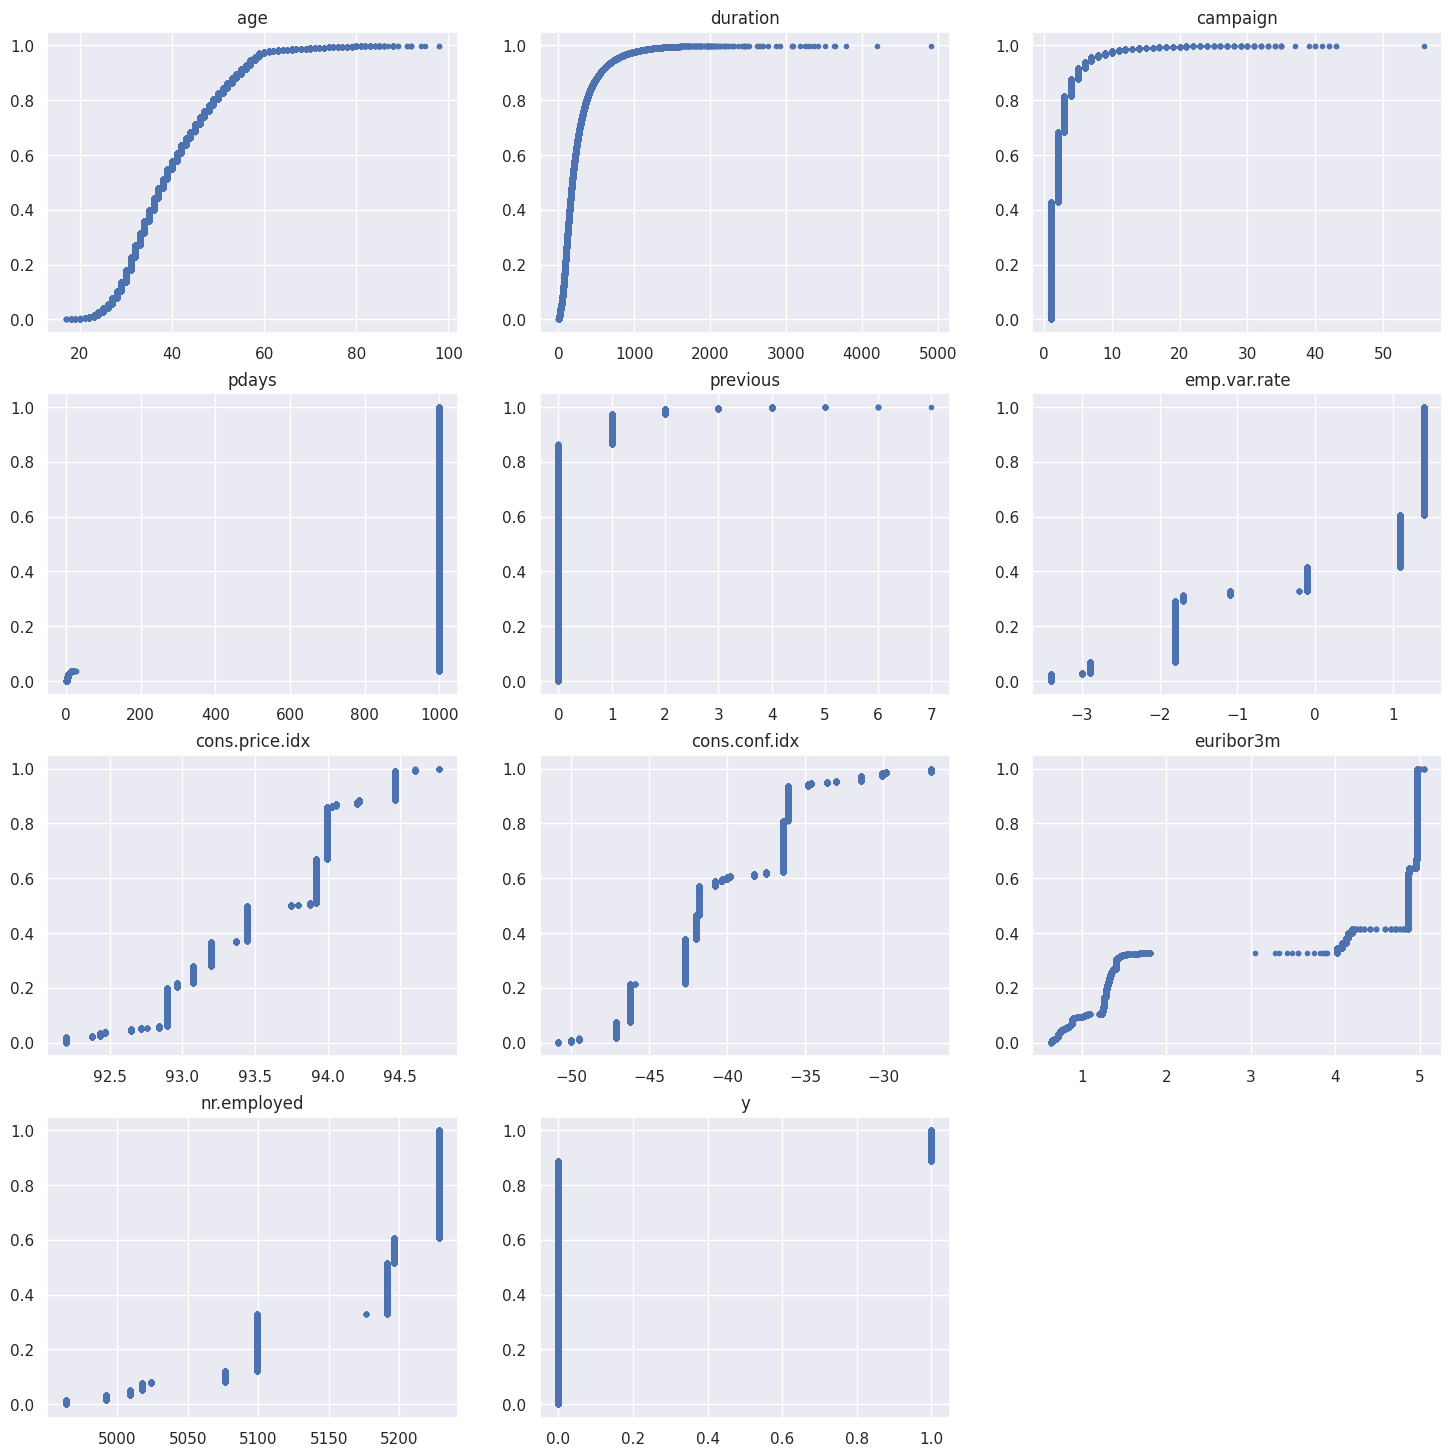

In [ ]:
#Empirical CDF
def ecdf(data):
  x = np.sort(data)
  y = np.arange(len(x))/float(len(x))
  return x,y
#plot ecdf of each numeric featue 
plt.figure(figsize=(18, 18))
for i, data in enumerate(df.select_dtypes(include=np.number)):
  ax = plt.subplot(4, 3, i + 1)
  ax.set_title(data)
  x, y=ecdf(df[data])
  plt.plot(x, y, marker='.', linestyle='none')

### *   Use histagram to see the distribution of each non-numeric feature

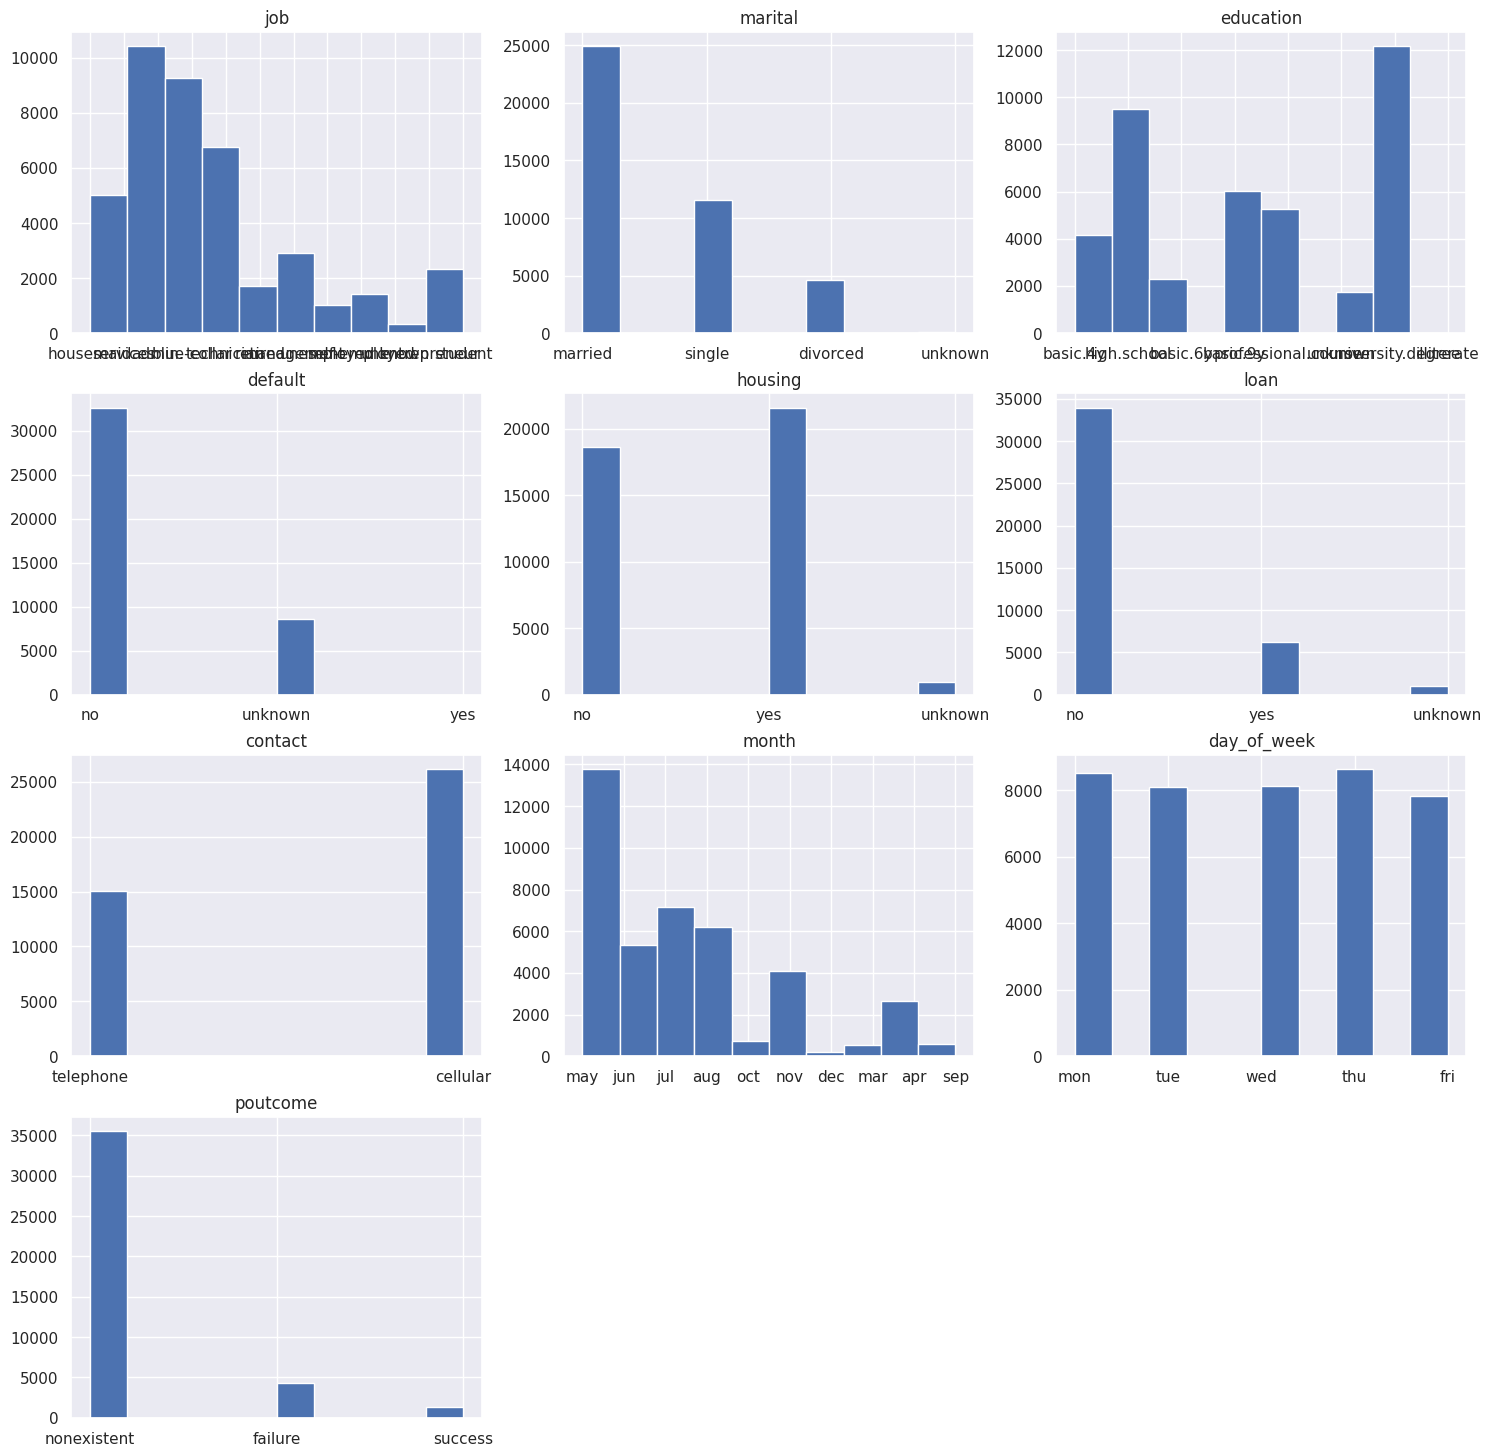

In [ ]:
plt.figure(figsize=(18, 18))
for i, data in enumerate(df.select_dtypes(include='object')):
  ax = plt.subplot(4, 3, i + 1)
  ax.set_title(data)
  plt.hist(df[data])

## From above we can see we need to balance dataset. Here I choose SMOTE method.

---





*   Before balancing data, we need to covert columns with string categories to numbers for model to train. 
*   One-hot encoding is used here.





In [43]:
# one-hot encoding
# encoder = OneHotEncoder()
# encoder_df = pd.DataFrame(encoder.fit_transform(train[df.select_dtypes(include='object').columns]).toarray())
# #merge one-hot encoded columns back with original DataFrame
# train = train.join(encoder_df)
# #drop original columns since no need of them
# drop=df.select_dtypes(include='object').columns
# for i in drop:
#   train.drop(i, axis=1, inplace=True)
# # view final df
# train

train=pd.get_dummies(train)#applying One-Hot Encoding
#data normalization
train=(train-train.mean())/train.std()
train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533016,0.010471,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,...,-0.133196,-0.11846,-0.484365,1.958976,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
1,1.628973,-0.421495,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,...,-0.133196,-0.11846,-0.484365,1.958976,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
2,-0.290182,-0.124518,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,...,-0.133196,-0.11846,-0.484365,1.958976,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
3,-0.002309,-0.413782,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,...,-0.133196,-0.11846,-0.484365,1.958976,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
4,1.533016,0.187886,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,...,-0.133196,-0.11846,-0.484365,1.958976,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164298,0.292021,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,...,-0.133196,-0.11846,2.064508,-0.510458,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
41184,0.573438,0.481006,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,...,-0.133196,-0.11846,2.064508,-0.510458,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
41185,1.533016,-0.267222,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,...,-0.133196,-0.11846,2.064508,-0.510458,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
41186,0.381522,0.708560,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,...,-0.133196,-0.11846,2.064508,-0.510458,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698


*   Use SMOTE to balance data
*   Three SMOTE ways: 'yes':'no' -> 0.5:1 and 'yes':'no' -> 0.75:1 and 'yes':'no' -> 1:1
*   I choose three different proportion because original proportion is 0.1:1. One hypothesis is that too much generation of fake data makes models has worse performance. 








In [ ]:
#make all column string
train.columns = train.columns.astype(str)

#make 'yes':'no' -> 0.5:1
oversample = SMOTE(sampling_strategy=0.5)
X_5, y_5 = oversample.fit_resample(train, test)

#make 'yes':'no' -> 0.75:1
oversample = SMOTE(sampling_strategy=0.75)
X_7, y_7 = oversample.fit_resample(train, test)

#make 'yes':'no' -> 1:1
oversample = SMOTE()
X, y = oversample.fit_resample(train, test)

*   Number of feature after one-hot encoding is 64. 
*   Do feature selection by random forest here.
*   Use random search to find best hyperparameters according to 'recall' score because recall is a measure of quantity and quality is not too important here to predict subscription.






In [ ]:
def rf_feature_selection(X, y):
  #data split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  rf = RandomForestClassifier()

  param_dist = {'n_estimators': randint(50,500),
                'max_depth': randint(1, 100)}

  # Create a random forest classifier
  rf = RandomForestClassifier()

  # Use random search to find the best hyperparameters
  rand_search = RandomizedSearchCV(rf, 
                                  param_distributions = param_dist, 
                                  n_iter=5, 
                                  scoring='recall',
                                  cv=5)

  # Fit the random search object to the data
  rand_search.fit(X_train, y_train)
  # Create a variable for the best model
  best_rf = rand_search.best_estimator_

  # Print the best hyperparameters
  print('Best hyperparameters:',  rand_search.best_params_)
  # Generate predictions with the best model
  y_pred = best_rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  # Create the confusion matrix
  # cm = confusion_matrix(y_test, y_pred)
  # ConfusionMatrixDisplay(confusion_matrix=cm).plot();

  y_predprob=best_rf.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob)
  # plt.plot(fpr,tpr)

  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)  
  print("F1 Score", metrics.f1_score(y_test,y_pred))
  print("Roc_auc_score", metrics.roc_auc_score(y_test, y_predprob))
  return best_rf
  

In [ ]:
model_list=[]
for i in [(X_5, y_5), (X_7, y_7), (X, y)]:
  print('-----------------------------------------------------')
  best=rf_feature_selection(i[0], i[1])
  model_list.append(best)
  print('-----------------------------------------------------')


-----------------------------------------------------
Best hyperparameters: {'max_depth': 63, 'n_estimators': 247}
Accuracy: 0.9416869334512492
Precision: 0.9010127409343351
Recall: 0.9247275775356245
F1 Score 0.9127161413088442
Roc_auc_score 0.9875383125680706
-----------------------------------------------------
-----------------------------------------------------
Best hyperparameters: {'max_depth': 89, 'n_estimators': 314}
Accuracy: 0.9491637845264604
Precision: 0.9271324474924989
Recall: 0.9565505804311775
F1 Score 0.94161179735539
Roc_auc_score 0.9912885140428406
-----------------------------------------------------
-----------------------------------------------------
Best hyperparameters: {'max_depth': 18, 'n_estimators': 485}
Accuracy: 0.9480142608407263
Precision: 0.9293152414010729
Recall: 0.970505849398583
F1 Score 0.9494640122511485
Roc_auc_score 0.9910089654333422
-----------------------------------------------------


*   From above we can see that random forest did a very good job with Recall metric 0.97.
*   Now let's do feature selection and see other models' performance
*   Here are the features sorted by importance







19    6.294599e-03
0     5.911623e-03
32    5.468273e-03
30    5.364564e-03
43    5.248736e-03
12    4.802375e-03
18    4.796455e-03
35    4.370897e-03
50    4.350865e-03
9     4.233730e-03
21    3.974824e-03
40    3.535460e-03
16    3.161054e-03
39    3.104663e-03
7     2.943693e-03
38    2.786023e-03
5     2.484724e-03
4     2.466241e-03
42    2.421457e-03
36    2.288061e-03
23    1.861365e-03
17    1.760953e-03
6     1.607188e-03
8     1.548417e-03
2     1.442862e-03
10    1.108614e-03
3     1.016266e-03
31    8.463360e-04
44    8.272742e-04
28    7.788139e-04
11    4.760309e-04
37    2.358414e-04
15    1.515008e-04
20    2.972559e-05
26    5.517012e-07
dtype: float64


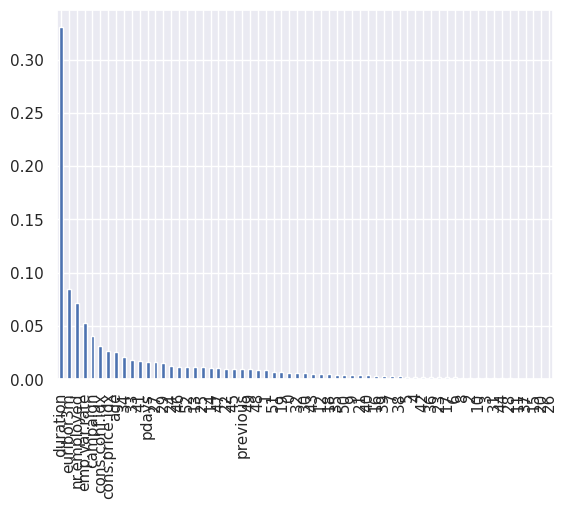

In [ ]:
#Use best model from above
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model_list[-1].feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances[-35:])
# # Plot a simple bar chart
feature_importances.plot.bar(); 

## Now we use random forest above as benchmark to drop some features and apply data to SVM, XGBoost and KNN

*   SVM
*   Compare model after dropping different number of feature 
*   We can see that dropping features very slightly improve metric recall and F1 score in SVM






In [ ]:
def drop_col_model(drop, clf, X, y, feature_importances):
  models=[]
  max_recall, max_i = 0, 0
  for i in drop:
    #data split   
    if(i!=0):
      new_train=X.drop(feature_importances.index[i:],axis=1)
    else:
      new_train=X
    X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.33)
    clf.fit(X_train, y_train)
    #add models into list
    models.append(clf)

    #predict and some metric to value
    pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('-----------------------------------------------------')
    print("Drop ", -i, " columns")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score", metrics.f1_score(y_test, pred))
    print('-----------------------------------------------------')

    if(recall>max_recall):
      max_i=i
  print("Best model by dropping ", -max_i, " columns")
  return models

In [ ]:
clf = svm.SVC()
svm_models = drop_col_model([0,-3,-6,-9,-12], clf, X, y, feature_importances)

-----------------------------------------------------
Drop  0  columns
Accuracy: 0.9250891302545394
Precision: 0.8926501982311681
Recall: 0.9670438589245891
F1 Score 0.9283590373865123
-----------------------------------------------------
-----------------------------------------------------
Drop  3  columns
Accuracy: 0.9267888234806401
Precision: 0.8942132442284325
Recall: 0.9692953572604543
F1 Score 0.9302417443513983
-----------------------------------------------------
-----------------------------------------------------
Drop  6  columns
Accuracy: 0.9314318879031589
Precision: 0.9017327685791298
Recall: 0.9687267311988086
F1 Score 0.934029993618379
-----------------------------------------------------
-----------------------------------------------------
Drop  9  columns
Accuracy: 0.9275764861951745
Precision: 0.8954506703867318
Recall: 0.9667001338688086
F1 Score 0.9297123315228324
-----------------------------------------------------
---------------------------------------------

*   Use XGBoost Here
*   Worked as good as other models. 



In [ ]:
clf = XGBClassifier()
xgb_models = drop_col_model([0,-3,-6,-9,-12], clf, X, y, feature_importances)

-----------------------------------------------------
Drop  0  columns
Accuracy: 0.950708896443081
Precision: 0.9511606622847159
Recall: 0.949975070633206
F1 Score 0.9505674967779486
-----------------------------------------------------
-----------------------------------------------------
Drop  3  columns
Accuracy: 0.9531133405190283
Precision: 0.95769965927034
Recall: 0.9487897250123497
F1 Score 0.9532238719550022
-----------------------------------------------------
-----------------------------------------------------
Drop  6  columns
Accuracy: 0.9511649116988641
Precision: 0.9499290661770842
Recall: 0.9516762812473873
F1 Score 0.950801871032409
-----------------------------------------------------
-----------------------------------------------------
Drop  9  columns
Accuracy: 0.9507918083077689
Precision: 0.954045954045954
Recall: 0.9474989665150889
F1 Score 0.950761189695939
-----------------------------------------------------
---------------------------------------------------


*   Use Knn Here
*   Works Better than other models. Maybe due to the fact that many data are generated by SMOTE which use knn as method to generate.
*   Dropping columns not works in KNN





In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
knn_models = drop_col_model([0, -3,-6,-9,-12,-15,-18], clf, X, y, feature_importances)

-----------------------------------------------------
Drop  0  columns
Accuracy: 0.9251720421192272
Precision: 0.8749907810310494
Recall: 0.9908134290963755
F1 Score 0.9293071711118943
-----------------------------------------------------
-----------------------------------------------------
Drop  3  columns
Accuracy: 0.9201558743056132
Precision: 0.8698177593843026
Recall: 0.9890200610913894
F1 Score 0.9255968477169125
-----------------------------------------------------
-----------------------------------------------------
Drop  6  columns
Accuracy: 0.9255036895779786
Precision: 0.8762894140024874
Recall: 0.9912280701754386
F1 Score 0.9302217217411564
-----------------------------------------------------
-----------------------------------------------------
Drop  9  columns
Accuracy: 0.9240112760135976
Precision: 0.8752094412471771
Recall: 0.9901104334926653
F1 Score 0.9291210703375741
-----------------------------------------------------
--------------------------------------------

*   Choose to drop 6 columns and see with which k, knn performs best
*   Conclusion: should choose k=3, about 0.995 in metric 'recall'





Text(0, 0.5, 'Accuracy Score')

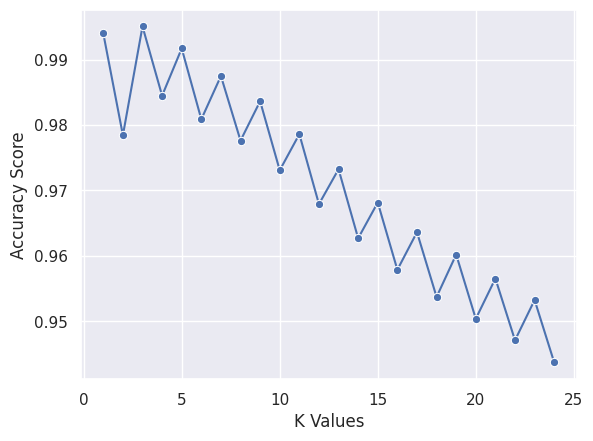

In [ ]:
new_train=X.drop(feature_importances.index[-6:],axis=1)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(new_train, y, test_size=0.33)
scores=[]
k_values = [i for i in range (1,25)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='recall')
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## From above models, we can see that knn performs better that other models. Maybe SMOTE method causes such result.
## Reflection: dataset should be split first and only use SMOTE in train set. This is more close to real life.
## Do it below

In [11]:
df=pd.read_csv('/content/bank-additional-full.csv',sep=';')
#label encoding for target
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
train=df.iloc[:, : 20]
test=df.loc[:, 'y']
train=pd.get_dummies(train)#applying One-Hot Encoding
train
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33)
oversample = SMOTE()
new_X, new_y = oversample.fit_resample(X_train, y_train)
new_X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,1153,3,999,0,1.4,93.918000,-42.700000,4.962000,5228.1,...,0,0,0,1,0,0,0,0,1,0
1,29,88,4,999,0,1.4,93.444000,-36.100000,4.963000,5228.1,...,0,0,1,0,0,0,0,0,1,0
2,23,523,2,999,0,-1.8,92.893000,-46.200000,1.250000,5099.1,...,0,0,1,0,0,0,0,0,1,0
3,37,282,2,6,1,-1.1,94.767000,-50.800000,1.050000,4963.6,...,0,0,0,1,0,0,0,0,0,1
4,30,89,1,999,0,1.4,94.465000,-41.800000,4.864000,5228.1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49087,36,199,3,999,0,-2.9,92.963000,-40.800000,1.280913,5076.2,...,0,0,0,0,0,0,0,0,1,0
49088,49,252,2,14,1,-1.7,94.201135,-40.152502,0.872212,4991.6,...,0,0,0,0,0,0,0,0,0,1
49089,39,431,3,999,0,1.4,94.453156,-41.819487,4.867100,5228.1,...,0,0,0,1,0,0,0,0,1,0
49090,31,732,2,999,0,-1.8,92.893000,-46.200000,1.296688,5099.1,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In [50]:
rf = RandomForestClassifier()
param_dist = {'n_estimators': randint(50,1000), 'max_depth': randint(1, 200)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                param_distributions = param_dist, 
                                n_iter=5, 
                                scoring='recall',
                                cv=5)

# Fit the random search object to the data
rand_search.fit(new_X, new_y)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#Calculate Revenue
cm = confusion_matrix(y_test, y_pred)
revenue = cm[1][1]*9-cm[0][1]

y_predprob=best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob)
# plt.plot(fpr,tpr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)  
print("F1 Score", metrics.f1_score(y_test,y_pred))
print("Roc_auc_score", metrics.roc_auc_score(y_test, y_predprob))
print("Revenue is ", revenue)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 555}
Accuracy: 0.8997278010740822
Precision: 0.5493421052631579
Recall: 0.6493843162670123
F1 Score 0.5951885951885952
Roc_auc_score 0.9355459403059729
Revenue is  8196


education_university.degree      7.286471e-03
age                              6.963220e-03
job_admin.                       6.923018e-03
day_of_week_wed                  6.634138e-03
education_professional.course    5.998433e-03
job_services                     5.681531e-03
previous                         5.417830e-03
loan_yes                         5.130737e-03
campaign                         4.569718e-03
month_apr                        4.218738e-03
month_jul                        3.789021e-03
month_aug                        3.775881e-03
month_nov                        3.709631e-03
loan_no                          3.507104e-03
month_jun                        3.262631e-03
education_basic.4y               3.155554e-03
job_management                   2.503839e-03
month_oct                        2.325129e-03
loan_unknown                     1.881190e-03
housing_unknown                  1.575066e-03
education_unknown                1.023537e-03
education_basic.6y               9

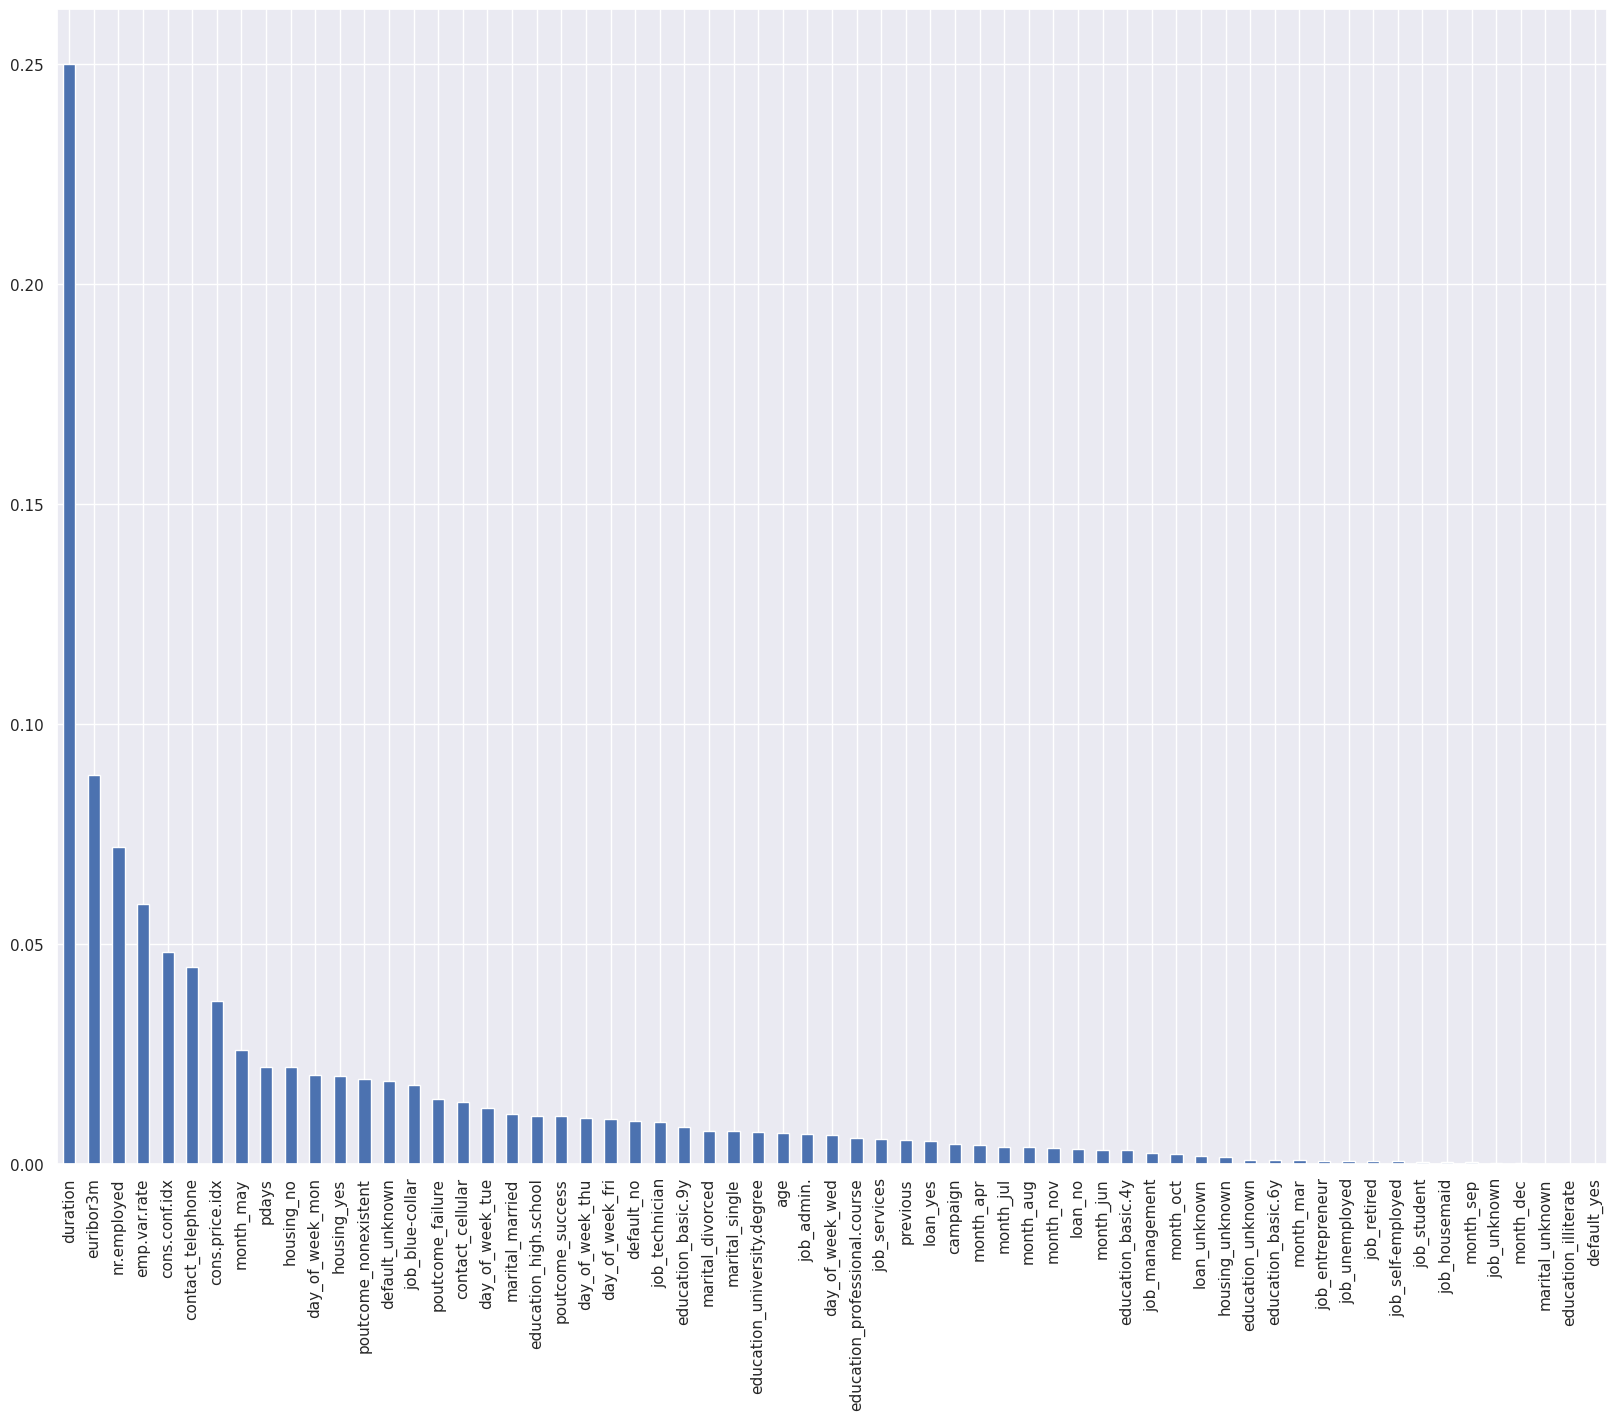

In [55]:
feature_importances = pd.Series(best_rf.feature_importances_, index=new_X.columns).sort_values(ascending=False)
print(feature_importances[-35:])
# # Plot a simple bar chart
plt.figure(figsize=(20,15))
feature_importances.plot.bar(); 

## Use orginal test set which has 0 data generated by SMOTE

*   Below is SVM model between training set with SMOTE and without SMOTE
*   We can see that with SMOTE the model has better performance.


*   The way to test whether a model performs correct is to calculate NumTruePositive*10 - NumTruePositive - NumFalsePositive. This is because by hypothesis, a call costs 1 dollar and a subscription earns 10 dollar






In [ ]:
#Without SMOTE
clf = svm.SVC()
clf.fit(X_train, y_train)
#predict and some metric to value
pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print('-----------------------------------------------------')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score", metrics.f1_score(y_test, pred))
print('-----------------------------------------------------')

-----------------------------------------------------
Accuracy: 0.9068638269697639
Precision: 0.6392543859649122
Recall: 0.38355263157894737
F1 Score 0.47944078947368424
-----------------------------------------------------


In [21]:
def svm_drop_col_model(drop, new_X, new_X_test, new_y, new_y_test, feature_importances):
  for i in drop:
    if(i!=0):
      new_train=new_X.drop(feature_importances.index[i:],axis=1)
      b=new_X_test.drop(feature_importances.index[i:],axis=1)
    else:
      new_train=new_X
      b=new_X_test
    clf = svm.SVC()
    clf.fit(new_train, new_y)

    #predict and some metric to value
    pred=clf.predict(b)
    #Calculate Revenue
    cm = confusion_matrix(y_test, pred)
    revenue = cm[1][1]*9-cm[0][1]
    #Three metrics
    accuracy = accuracy_score(new_y_test, pred)
    precision = precision_score(new_y_test, pred)
    recall = recall_score(new_y_test, pred)
    print('-----------------------------------------------------')
    print("Drop ", -i, " columns")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score", metrics.f1_score(new_y_test, pred))
    print("Revenue is ", revenue)
    print('-----------------------------------------------------')


In [ ]:
svm_drop_col_model([0,-13,-23,-33,-43, -53], new_X, X_test, new_y, y_test, feature_importances)

-----------------------------------------------------
Drop  0  columns
Accuracy: 0.8836901346281174
Precision: 0.4872969596001666
Recall: 0.7697368421052632
F1 Score 0.5967865340474368
Revenue is  9299
-----------------------------------------------------
-----------------------------------------------------
Drop  13  columns
Accuracy: 0.8862649893327448
Precision: 0.4943868739205527
Recall: 0.7532894736842105
F1 Score 0.5969760166840459
Revenue is  9134
-----------------------------------------------------
-----------------------------------------------------
Drop  23  columns
Accuracy: 0.8853821820054439
Precision: 0.49201680672268905
Recall: 0.7703947368421052
F1 Score 0.6005128205128205
Revenue is  9330
-----------------------------------------------------
-----------------------------------------------------
Drop  33  columns
Accuracy: 0.8840579710144928
Precision: 0.4887187751813054
Recall: 0.7980263157894737
F1 Score 0.6061969015492255
Revenue is  9648
--------------------------

*   Revenue is increasing, choose to drop more.



In [ ]:
svm_drop_col_model([-54,-55,-56,-57,-58], new_X, X_test, new_y, y_test, feature_importances)

-----------------------------------------------------
Drop  54  columns
Accuracy: 0.8463179577723828
Precision: 0.41509997015816175
Recall: 0.9151315789473684
F1 Score 0.571135290494765
Revenue is  10559
-----------------------------------------------------
-----------------------------------------------------
Drop  55  columns
Accuracy: 0.8440373721768557
Precision: 0.4119718309859155
Recall: 0.9236842105263158
F1 Score 0.5698051948051949
Revenue is  10632
-----------------------------------------------------
-----------------------------------------------------
Drop  56  columns
Accuracy: 0.8419039211358788
Precision: 0.40817518248175183
Recall: 0.9197368421052632
F1 Score 0.5654196157735085
Revenue is  10555
-----------------------------------------------------
-----------------------------------------------------
Drop  57  columns
Accuracy: 0.8403590083131023
Precision: 0.4057971014492754
Recall: 0.9210526315789473
F1 Score 0.5633802816901409
Revenue is  10550
---------------------

In [20]:
def xgb_drop_col_model(drop, new_X, new_X_test, new_y, new_y_test, feature_importances):
  for i in drop:
    if(i!=0):
      new_train=new_X.drop(feature_importances.index[i:],axis=1)
      b=new_X_test.drop(feature_importances.index[i:],axis=1)
    else:
      new_train=new_X
      b=new_X_test
    clf = XGBClassifier()
    clf.fit(new_train, new_y)

    #predict and some metric to value
    pred=clf.predict(b)
    #Calculate Revenue
    cm = confusion_matrix(y_test, pred)
    revenue = cm[1][1]*9-cm[0][1]
    #Three metrics
    accuracy = accuracy_score(new_y_test, pred)
    precision = precision_score(new_y_test, pred)
    recall = recall_score(new_y_test, pred)
    print('-----------------------------------------------------')
    print("Drop ", -i, " columns")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score", metrics.f1_score(new_y_test, pred))
    print("Revenue is ", revenue)
    print('-----------------------------------------------------')


In [36]:
xgb_drop_col_model([0,-13,-23,-33,-43, -53, -57], new_X, X_test, new_y, y_test, feature_importances)

-----------------------------------------------------
Drop  0  columns
Accuracy: 0.9129699109835945
Precision: 0.5994108983799705
Recall: 0.5602202339986235
F1 Score 0.5791533262184276
Revenue is  6782
-----------------------------------------------------
-----------------------------------------------------
Drop  13  columns
Accuracy: 0.9109835944971677
Precision: 0.586600142551675
Recall: 0.5664143152099105
F1 Score 0.5763305322128851
Revenue is  6827
-----------------------------------------------------
-----------------------------------------------------
Drop  23  columns
Accuracy: 0.9104686235562421
Precision: 0.5821727019498607
Recall: 0.5753613214039918
F1 Score 0.5787469712703358
Revenue is  6924
-----------------------------------------------------
-----------------------------------------------------
Drop  33  columns
Accuracy: 0.9073052306334143
Precision: 0.564290473017988
Recall: 0.5829318651066758
F1 Score 0.5734597156398104
Revenue is  6969
-----------------------------

In [19]:
def knn_drop_col_model(drop, new_X, new_X_test, new_y, new_y_test, feature_importances):
  for i in drop:
    if(i!=0):
      new_train=new_X.drop(feature_importances.index[i:],axis=1)
      b=new_X_test.drop(feature_importances.index[i:],axis=1)
    else:
      new_train=new_X
      b=new_X_test
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(new_train, new_y)

    #predict and some metric to value
    pred=clf.predict(b)
    #Calculate Revenue
    cm = confusion_matrix(y_test, pred)
    revenue = cm[1][1]*9-cm[0][1]
    print(cm)
    #Three metrics
    accuracy = accuracy_score(new_y_test, pred)
    precision = precision_score(new_y_test, pred)
    recall = recall_score(new_y_test, pred)
    print('-----------------------------------------------------')
    print("Drop ", -i, " columns")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score", metrics.f1_score(new_y_test, pred))
    print("Revenue is ", revenue)
    print('-----------------------------------------------------')


In [ ]:
knn_drop_col_model([0,-13,-23,-33,-43, -53, -58], new_X, X_test, new_y, y_test, feature_importances)

-----------------------------------------------------
Drop  0  columns
Accuracy: 0.8636062679320239
Precision: 0.43941717791411045
Recall: 0.7451235370611183
F1 Score 0.5528219971056441
Revenue is  8852
-----------------------------------------------------
-----------------------------------------------------
Drop  13  columns
Accuracy: 0.8639741043183992
Precision: 0.44007707129094414
Recall: 0.7425227568270482
F1 Score 0.5526252117106218
Revenue is  8825
-----------------------------------------------------
-----------------------------------------------------
Drop  23  columns
Accuracy: 0.8647097770911498
Precision: 0.44168926772568773
Recall: 0.741222366710013
F1 Score 0.5535324107793154
Revenue is  8819
-----------------------------------------------------
-----------------------------------------------------
Drop  33  columns
Accuracy: 0.8654454498639005
Precision: 0.44300822561692127
Recall: 0.735370611183355
F1 Score 0.5529210461989733
Revenue is  8757
-------------------------

# From models above and revenue, we can see that SVM performs best, with 92.3% recall, and 10632 dollars as revenue
# Another conclusion: Random forest, xgboost, knn do not need standardized data.
